In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
df=pd.read_csv('24-hours dataset.csv')

In [71]:
df

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936
...,...,...,...,...,...,...,...,...,...
8732,8732,2023-12-30 20:00:00,5,20,1,16.464144,0,7.909442,23111
8733,8733,2023-12-30 21:00:00,5,21,1,5.597822,0,3.319968,22308
8734,8734,2023-12-30 22:00:00,5,22,1,7.153052,0,9.686246,21935
8735,8735,2023-12-30 23:00:00,5,23,1,11.815588,0,0.498725,20497


In [72]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [73]:
import numpy as np
import pandas as pd
import datetime

def estimate_power_consumption(date):
    hour = date.hour
    month = date.month

    # Define base demand depending on the season (winter, summer, others)
    if month in [12, 1, 2]:  # Winter months
        base_demand = np.random.uniform(4500, 5500)/24  # Higher base demand in winter
    elif month in [5, 6, 7]:  # Summer months (Delhi's peak summer)
        base_demand = np.random.uniform(7000, 8000)/24  # Higher base demand in summer
    else:
        base_demand = np.random.uniform(5500, 6500)/24  # Other months (Spring, Monsoon)

    # Adjust demand based on the hour of day (morning/evening peaks, midday dip)
    if 6 <= hour <= 10:  # Morning peak
        base_demand *= 1.3  # Increase demand by 30%
    elif 12 <= hour <= 15:  # Midday dip
        base_demand *= 0.8  # Decrease demand by 20%
    elif 18 <= hour <= 22:  # Evening peak
        base_demand *= 1.5  # Increase demand by 50%
    else:
        base_demand *= 1.0  # Default demand for off-peak hours (e.g., night)

    return base_demand

# Creating a sample DataFrame with a 'timestamp' column for testing


# Apply the function to estimate the load for each hour
df['load'] = df['timestamp'].apply(estimate_power_consumption)

# Show the first few rows
df.head()


,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,187.857749
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,211.124363
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,196.464158
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,199.275425
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,210.307039


In [191]:
def get_temperature(date):

    month=date.month
    hour=date.hour
    # Define base temperatures for different months
    if month in [12, 1, 2]:  # Winter
        if 0 <= hour < 6:
            return np.random.uniform(5, 10)  # Night
        elif 12 <= hour < 16:
            return np.random.uniform(15, 25)  # Day
        else:
            return np.random.uniform(10, 20)  # Morning/Evening
    elif month in [4, 5, 6]:  # Summer
        if 0 <= hour < 6:
            return np.random.uniform(28, 35)  # Night
        elif 12 <= hour < 16:
            return np.random.uniform(38, 45)  # Day
        else:
            return np.random.uniform(30, 38)  # Morning/Evening
    elif month in [7, 8, 9]:  # Monsoon
        if 0 <= hour < 6:
            return np.random.uniform(25, 30)  # Night
        elif 12 <= hour < 16:
            return np.random.uniform(30, 35)  # Day
        else:
            return np.random.uniform(25, 30)  # Morning/Evening
    else:  # Spring and Autumn
        if 0 <= hour < 6:
            return np.random.uniform(15, 20)  # Night
        elif 12 <= hour < 16:
            return np.random.uniform(25, 30)  # Day
        else:
            return np.random.uniform(20, 25)  # Morning/Evening

df['temperature'] = df['timestamp'].apply(get_temperature)

# Display the first few rows of the DataFrame with the estimated power consumption
df.head()

,Unnamed: 0,timestamp,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,0,1,9.454303,0,7.819507,187.857749,Normal Operation
1,1,2023-01-01 01:00:00,1,1,8.736068,0,0.886376,211.124363,Normal Operation
2,2,2023-01-01 02:00:00,2,1,8.988896,0,0.798470,196.464158,Normal Operation
3,3,2023-01-01 03:00:00,3,1,8.056122,0,3.067700,199.275425,Normal Operation
4,4,2023-01-01 04:00:00,4,1,9.032841,0,0.359479,210.307039,Normal Operation


In [192]:
def assign_compensation_method(row):
    if row['is_holiday'] == 1:
        return 'Lower Power Supply'
    elif row['solar_generation'] > 200:
        return 'Increased Renewable Energy Integration'
    elif row['hour_of_day'] >= 18 and row['hour_of_day'] <= 22:
        return 'Peak Load Shifting'
    elif row['temperature'] > 35:
        return 'Increased Power Supply'
    else:
        return 'Normal Operation'

df['compensation_method'] = df.apply(assign_compensation_method, axis=1)

print(df[['timestamp', 'load', 'compensation_method']].head(10))


            timestamp        load                     compensation_method
0 2023-01-01 00:00:00  187.857749                        Normal Operation
1 2023-01-01 01:00:00  211.124363                        Normal Operation
2 2023-01-01 02:00:00  196.464158                        Normal Operation
3 2023-01-01 03:00:00  199.275425                        Normal Operation
4 2023-01-01 04:00:00  210.307039                        Normal Operation
5 2023-01-01 05:00:00  225.324176                        Normal Operation
6 2023-01-01 06:00:00  297.571401  Increased Renewable Energy Integration
7 2023-01-01 07:00:00  285.251524  Increased Renewable Energy Integration
8 2023-01-01 08:00:00  250.306845                        Normal Operation
9 2023-01-01 09:00:00  261.979484  Increased Renewable Energy Integration


In [193]:
df.to_csv('2023 refined.csv', index=False)

from IPython.display import FileLink

FileLink('2023 refined.csv')


C:\Users\ASUS\Desktop\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\2023 refined.csv

In [195]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [215]:
X = df[['temperature', 'solar_generation', 'hour_of_day', 'load', 'is_holiday', 'is_weekend']]

y = df['compensation_method']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [216]:
X_reg = df[['temperature', 'solar_generation', 'hour_of_day', 'is_holiday', 'is_weekend']]

y_reg = df['load']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

Accuracy: 1.00
[[ 112    0    0    0    0]
 [   0  559    0    0    0]
 [   0    0   22    0    0]
 [   1    1    0 1442    0]
 [   0    0    0    0  485]]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

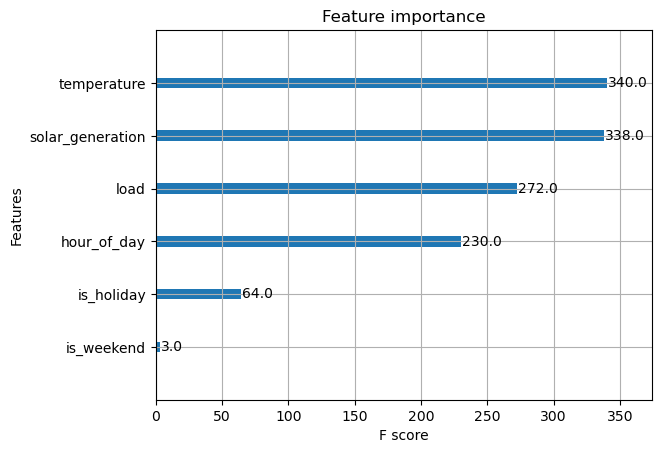

In [217]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), eval_metric='mlogloss', random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# print(classification_report(y_test, y_pred, target_names=le.classes_))
print( confusion_matrix(y_test, y_pred))


xgb.plot_importance(xgb_clf)


In [218]:
xgb_reg = XGBRegressor(
    n_estimators=100,  
    learning_rate=0.1,  
    max_depth=6,  
    random_state=42  
)

In [219]:
xgb_reg.fit(X_train_reg, y_train_reg)

leb=LabelEncoder()
y_reg=leb.fit_transform(y_reg)
y_pred_reg = xgb_reg.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 822.2920880290437
R² Score: 0.8584255053620382


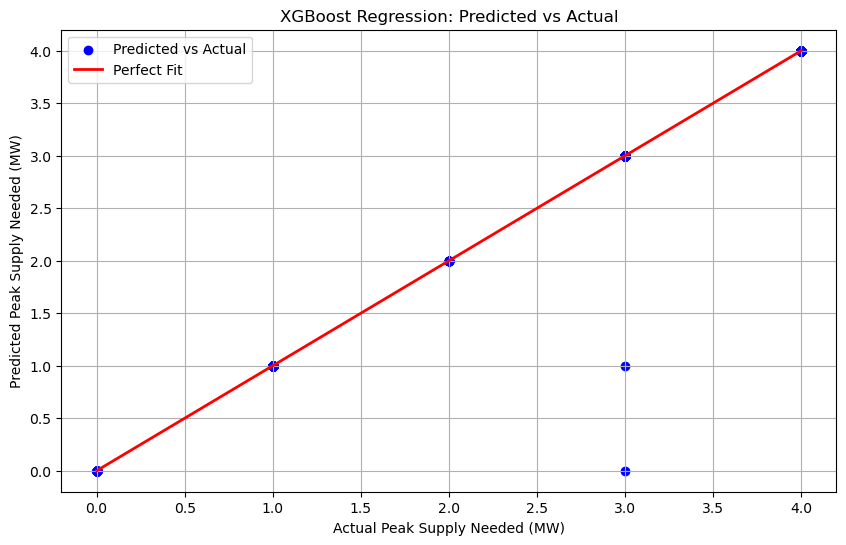

In [220]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Peak Supply Needed (MW)')
plt.ylabel('Predicted Peak Supply Needed (MW)')
plt.title('XGBoost Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
def predict_24_hour_load_and_compensation(date, temperature, solar_generation, is_holiday, is_weekend, xgb_clf, xgb_reg, le):
   
    results = []

    for hour in range(24):
        new_data_class = pd.DataFrame({
            'temperature': [temperature],
            'solar_generation': [solar_generation],
            'hour_of_day': [hour],
            'load': [0],  
            'is_holiday': [is_holiday],
            'is_weekend': [is_weekend]
        })

        new_data_reg = pd.DataFrame({
            'temperature': [temperature],
            'solar_generation': [solar_generation],
            'hour_of_day': [hour],
            'is_holiday': [is_holiday],
            'is_weekend': [is_weekend]
        })

        predicted_class_label = xgb_clf.predict(new_data_class)
        predicted_compensation_method = le.inverse_transform(predicted_class_label)

        predicted_peak_supply = xgb_reg.predict(new_data_reg)


        results.append({
            'date': date,
            'hour_of_day': hour,
            'compensation_method': predicted_compensation_method[0],
            'peak_supply_needed': predicted_peak_supply[0]
        })

    df_predictions = pd.DataFrame(results)

    plot_predictions(df_predictions)

    return df_predictions


def plot_predictions(df_predictions):

    plt.figure(figsize=(14, 7))

    sns.lineplot(data=df_predictions, x='hour_of_day', y='peak_supply_needed', marker='o', color='blue', label='Peak Supply Needed (MW)')

    sns.scatterplot(data=df_predictions, x='hour_of_day', y='peak_supply_needed', hue='compensation_method', palette='Set2', s=100, legend='full', marker='o')

    plt.title(f'Hourly Predictions for {df_predictions["date"][0]}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Peak Supply Needed (MW)')
    plt.legend(title='Compensation Method')
    plt.grid(True)
    plt.show()

date = '2024-10-17'
temperature = 30
solar_generation = 175
is_holiday = 1  
is_weekend = 1  

df_24_hour_predictions = predict_24_hour_load_and_compensation(date, temperature, solar_generation, is_holiday, is_weekend, xgb_clf, xgb_reg, le)

print(df_24_hour_predictions)


NameError: name 'xgb_clf' is not defined